# Importar librerias

In [44]:
import pandas as pd 
import matplotlib.pyplot as plt #visualizacion de datos
import seaborn as sns # visualizacion de datos
from sklearn.ensemble import RandomForestClassifier #modelo bosque aleatorio
from sklearn.impute import SimpleImputer #imputar valores nulos 
from sklearn.preprocessing import OrdinalEncoder #codificar variables categoricas


# Entendimiento de los datos

## Leer data

In [45]:
df_train = pd.read_csv('titanic/train.csv')
df_test = pd.read_csv('titanic/test.csv')

## Vision general

In [46]:
df_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
617,618,0,3,"Lobb, Mrs. William Arthur (Cordelia K Stanlick)",female,26.0,1,0,A/5. 3336,16.1000,NaN,S
57,58,0,3,"Novel, Mr. Mansouer",male,28.5,0,0,2697,7.2292,NaN,C
598,599,0,3,"Boulos, Mr. Hanna",male,NaN,0,0,2664,7.2250,NaN,C
333,334,0,3,"Vander Planke, Mr. Leo Edmondus",male,16.0,2,0,345764,18.0000,NaN,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C


In [47]:
df_train.shape

(891, 12)

In [48]:
df_train.info() #ver tipo de dato

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Ver valores duplicados

In [49]:
df_train.duplicated().sum()

np.int64(0)

## Ver valores null

In [50]:
df_train.isnull().sum().sort_values(ascending=False) # lo ordenamos

Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64

## Valores unicos

In [51]:
df_train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [52]:
columnas_categoricas = df_train.select_dtypes(include=['object']).columns

for column in columnas_categoricas:
    if df_train[column].nunique() <= 10:
        print(f"{column}: {df_train[column].unique()}")

Sex: ['male' 'female']
Embarked: ['S' 'C' 'Q' nan]


In [53]:
columnas_numericas = df_train.select_dtypes(include=['int64', 'Float64']).columns

for column in columnas_numericas:
    if df_train[column].nunique() <= 10:
        print(f"{column}: {df_train[column].unique()}")

Survived: [0 1]
Pclass: [3 1 2]
SibSp: [1 0 3 4 2 5 8]
Parch: [0 1 2 5 3 4 6]


## Analisis exploratorio (eda)

<function matplotlib.pyplot.show(close=None, block=None)>

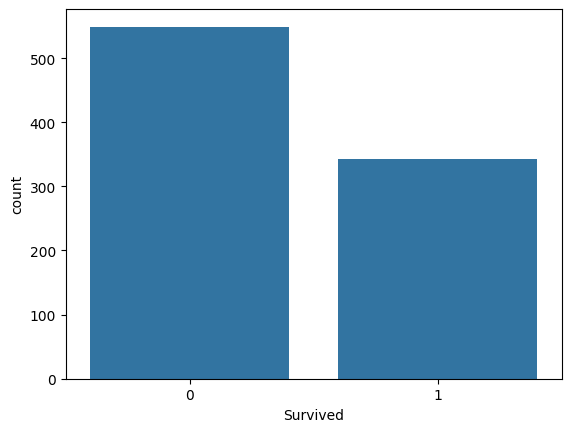

In [54]:
sns.countplot(x='Survived', data=df_train)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

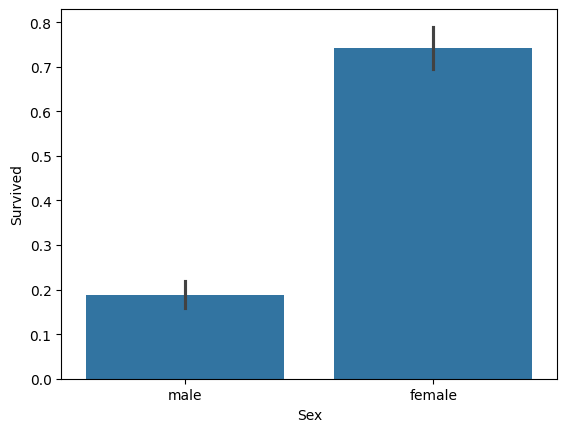

In [55]:
sns.barplot(x='Sex', y='Survived', data=df_train)
plt.show

## Concluciones

* PassengerId, Cabin, Fare, ticket y name no aportan a la prediciion --> Elliminar

In [56]:
df_train = df_train.drop(columns=['Cabin', 'Fare', 'Ticket', 'Name'])
df_test = df_test.drop(columns=['Cabin', 'Fare', 'Ticket', 'Name'])
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


## Preparacion de los datos

## pasar columnas predictoras a target

In [57]:
X=df_train.drop(['Survived'], axis= 1)
y=df_train.Survived

## pasar columnas categoricas a numericas

In [58]:
s=(X.dtypes=='object')
object_coals=list(s[s].index)

ordinal_encoder = OrdinalEncoder()
X[object_coals]=ordinal_encoder.fit_transform(X[object_coals])

In [59]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,3,1.0,22.0,1,0,2.0
1,2,1,0.0,38.0,1,0,0.0
2,3,3,0.0,26.0,0,0,2.0
3,4,1,0.0,35.0,1,0,2.0
4,5,3,1.0,35.0,0,0,2.0


## Rellernar null

In [60]:
imputer=SimpleImputer()
x_transformed=pd.DataFrame(imputer.fit_transform(X))

x_transformed.columns=X.columns

In [61]:
x_transformed.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

# Model

In [62]:
my_model=RandomForestClassifier()
my_model.fit(x_transformed, y)

RandomForestClassifier()

# Predicciones

In [63]:
df_test[object_coals]=ordinal_encoder.fit_transform(df_test[object_coals]) #categoricas a numericas

df_test_transformed=pd.DataFrame(imputer.transform(df_test))
df_test_transformed.columns=df_test.columns

predictions = my_model.predict(df_test_transformed)

# Submission

In [65]:
output=pd.DataFrame({'passegerId':df_test.PassengerId, 'survived':predictions})
output.to_csv('submission.csv', index=False)